I am exploring the Adaline GD vs. Adaline SGD and how Field Goal Percentage and Steals predict whether or not players get end of season awards. I am going to measure accuracy of the algorithm's ability to predict the correct classifier over time. I added the code to track accuracy in both of the algorithm implementations. This is from the same dataset as the Perceptron assignment, but I added more data (200 rows). 


In [24]:
import numpy as np

class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.) # changed _ to 64 #LS
        self.losses_ = []
        self.accuracies_ = []  # Initialize a list to store accuracy after each epoch

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
            epoch_accuracy = np.mean(self.predict(X) == y)
            self.accuracies_.append(epoch_accuracy)
        return self


    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [25]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        self.accuracies_ = []  # Initialize a list to store accuracy after each epoch
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
            epoch_accuracy = np.mean(self.predict(X) == y)
            self.accuracies_.append(epoch_accuracy)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.) # changed _ to 64 #LS
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [ ]:
#Data is from the 2022 NBA season and it directly downloaded from the basketball-reference.com website. I have only used the first 200 rows of the data for this example.

#Link: https://www.basketball-reference.com/leagues/NBA_2023_per_game.html 

#Predicts if someone got an award based on two field goal percentage and steals per game.

import pandas as pd

df = pd.read_csv('NBA2022.csv')

df['assist-turnover-ratio'] = df['AST']/df['TOV']

df['isAward'] = df['Awards'].notna().astype(int)

df_per_game_final = df[['FG%', 'STL', 'isAward']]

numRows = len(df_per_game_final)

df_per_game_final = df_per_game_final.sort_values(by='isAward', ascending=False)



Number with award = 47


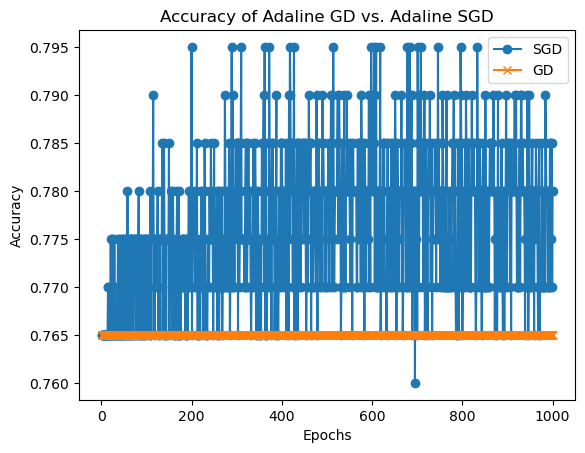

In [40]:
import matplotlib.pyplot as plt

y = df_per_game_final.iloc[0:numRows, 2].values
X = df_per_game_final.iloc[0:numRows, [0,1]].values

basketball_adalineSGD = AdalineSGD(0.005, 1000)
basketball_adalineGD = AdalineGD(0.01, 1000)

basketball_adalineSGD.fit(X, y)
basketball_adalineGD.fit(X, y)

plt.plot(range(1, len(basketball_adalineSGD.accuracies_) + 1), basketball_adalineSGD.accuracies_, marker='o')
plt.plot(range(1, len(basketball_adalineGD.accuracies_) + 1), basketball_adalineGD.accuracies_, marker='x')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of Adaline GD vs. Adaline SGD')
plt.legend(['SGD', 'GD'])

plt.show()

This graph shows that SGD performs better than GD and gets to anywhere from 76.5% accuracy to 80% accuracy with the best hyperparameters. Since the data is not linearly seperable at all, this is pretty solid I think. 